# POKEMON

### Analitika kitabxanalarının yüklənməsi və Datasetin Gətirilməsi

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pokemon_data = pd.read_excel("/Pokemon.xlsx")

#### Datasetdə ən çox yayılmış Pokemon növü hansıdır? Bu tip nə qədər Pokemon var?

In [64]:
most_common_type = pokemon_data['type1'].value_counts().idxmax()
number_of_most_common = pokemon_data['type1'].value_counts().max()
print("Ən çox yayılmış Pokemon növü:", most_common_type)
print("Bu növdə", number_of_most_common, "təxminən Pokemon var.")


Ən çox yayılmış Pokemon növü: water
Bu növdə 114 təxminən Pokemon var.


#### Digər növləri ilə müqayisədə həddindən artıq yüksək və ya aşağı statistikaya malik hər hansı Pokemon varmı?

In [65]:
max_total_pokemon = pokemon_data.loc[pokemon_data['base_total'].idxmax()]
min_total_pokemon = pokemon_data.loc[pokemon_data['base_total'].idxmin()]
print("Ən yüksək total dəyərə malik Pokemon:")
print(max_total_pokemon)
print("\nƏn aşağı total dəyərə malik Pokemon:")
print(min_total_pokemon)


Ən yüksək total dəyərə malik Pokemon:
#                      150
name                Mewtwo
type1              psychic
type2                  NaN
base_total             780
hp                     106
attack                 150
defense                 70
sp_attack              194
sp_defense             120
speed                  140
height_m               2.0
weight_kg            122.0
is_legendary             1
generation               1
capture_rate             3
base_happiness           0
percentage_male        NaN
Name: 149, dtype: object

Ən aşağı total dəyərə malik Pokemon:
#                      191
name               Sunkern
type1                grass
type2                  NaN
base_total             180
hp                      30
attack                  30
defense                 30
sp_attack               30
sp_defense              30
speed                   30
height_m               0.3
weight_kg              1.8
is_legendary             0
generation               2
capture_

#### Pokemonun capture rate ilə onun base total arasında əlaqə varmı? Bəs onun nadirliyi (legendary və ya deyil)?

In [66]:
correlation = pokemon_data['capture_rate'].corr(pokemon_data['base_total'])
rare_pokemon = pokemon_data[pokemon_data['is_legendary'] == True]
print("Capture Rate və Total arasındakı korelasiya:", correlation)
if correlation > 0:
    print("İki dəyişkən arasında pozitiv korelasiya var.")
elif correlation < 0:
    print("İki dəyişkən arasında negativ korelasiya var.")
else:
    print("İki dəyişkən arasında korelasiya yoxdur.")

if rare_pokemon.empty:
    print("Nadir Pokemonlar yoxdur.")
else:
    print("Nadir Pokemonlar var.")


Capture Rate və Total arasındakı korelasiya: -0.7121201962428773
İki dəyişkən arasında negativ korelasiya var.
Nadir Pokemonlar var.


#### Hansı Pokemon ən yüksək hücum statistikasına malikdir?

In [67]:
max_attack_pokemon = pokemon_data.loc[pokemon_data['attack'].idxmax()]
print("Ən yüksək hücum statistikasına malik olan Pokemon:", max_attack_pokemon['name'])
print("Hücum statistikası:", max_attack_pokemon['attack'])


Ən yüksək hücum statistikasına malik olan Pokemon: Heracross
Hücum statistikası: 185


#### Base total ilə HP, Attack, Defense, Special Attack, Special Defense və Speed kimi digər atributların hər biri arasında correlation nədir?

In [68]:
correlation_matrix = pokemon_data[['base_total', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']].corr()
print(correlation_matrix)


            base_total        hp    attack   defense  sp_attack  sp_defense  \
base_total    1.000000  0.621062  0.729998  0.630151   0.740986    0.717958   
hp            0.621062  1.000000  0.411057  0.242244   0.366553    0.366867   
attack        0.729998  0.411057  1.000000  0.469471   0.367680    0.266277   
defense       0.630151  0.242244  0.469471  1.000000   0.242498    0.526251   
sp_attack     0.740986  0.366553  0.367680  0.242498   1.000000    0.512230   
sp_defense    0.717958  0.366867  0.266277  0.526251   0.512230    1.000000   
speed         0.547575  0.161904  0.351967  0.008937   0.438082    0.227397   

               speed  
base_total  0.547575  
hp          0.161904  
attack      0.351967  
defense     0.008937  
sp_attack   0.438082  
sp_defense  0.227397  
speed       1.000000  


#### Əfsanəvi və əfsanəvi olmayan Pokemonun ortalama hücum  arasında əhəmiyyətli fərq varmı?

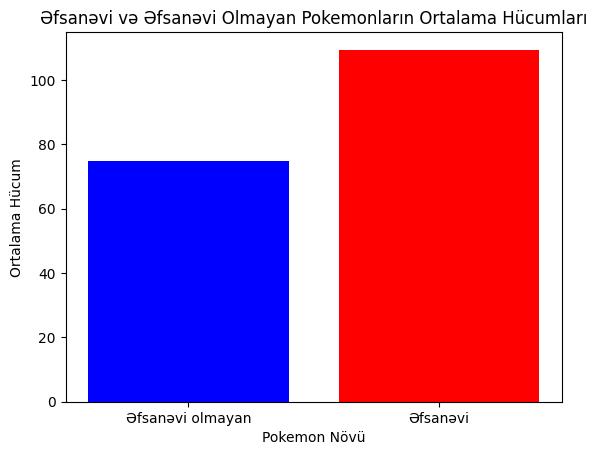

In [69]:
non_legendary_attack = pokemon_data[pokemon_data['is_legendary'] == False]['attack'].mean()
legendary_attack = pokemon_data[pokemon_data['is_legendary'] == True]['attack'].mean()
x = ['Əfsanəvi olmayan', 'Əfsanəvi']
y = [non_legendary_attack, legendary_attack]
plt.bar(x, y, color=['blue', 'red'])
plt.xlabel('Pokemon Növü')
plt.ylabel('Ortalama Hücum')
plt.title('Əfsanəvi və Əfsanəvi Olmayan Pokemonların Ortalama Hücumları')
plt.show()


#### Hansı tip 1 və tip 2 kombinasiyaları Pokemonlar arasında ən çox yayılmışdır?

      type1     type2  Count
91   normal    flying     26
68    grass    poison     14
4       bug    flying     13
8       bug    poison     11
142   water    ground      9
139   water    flying      7
124    rock     water      6
63    grass    flying      6
119    rock    ground      6
41     fire  fighting      6


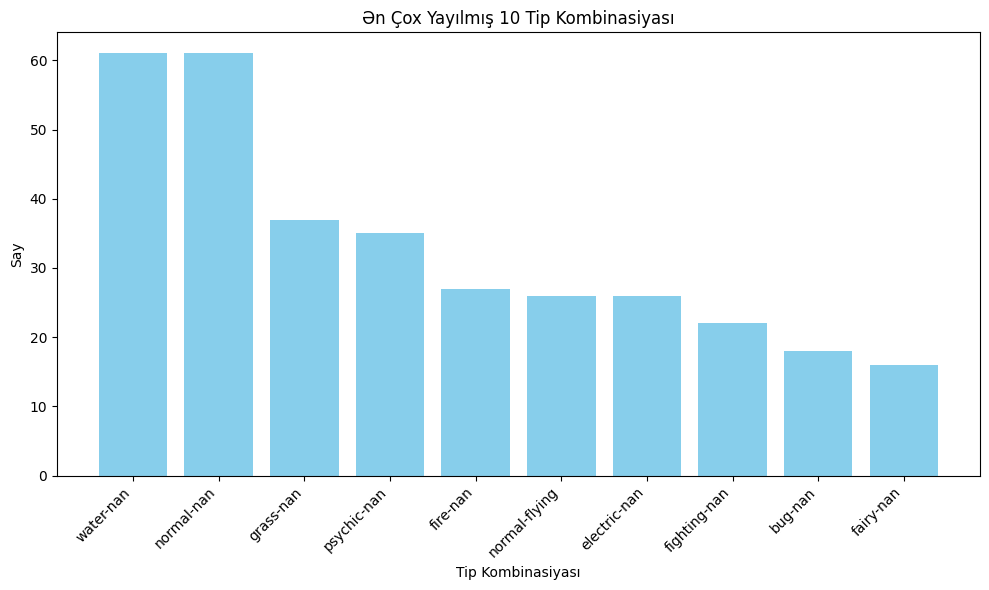

In [70]:
combination_counts = pokemon_data.groupby(['type1', 'type2']).size().reset_index(name='Count')
most_common_combinations = combination_counts.sort_values(by='Count', ascending=False).head(10)
print(most_common_combinations)
type_combinations = {}
for index, row in pokemon_data.iterrows():
    combination = (row['type1'], row['type2'])
    type_combinations[combination] = type_combinations.get(combination, 0) + 1
top_10_combinations = dict(sorted(type_combinations.items(), key=lambda item: item[1], reverse=True)[:10])
x = [f'{combination[0]}-{combination[1]}' if combination[1] else combination[0] for combination in top_10_combinations.keys()]
y = top_10_combinations.values()
plt.figure(figsize=(10, 6))
plt.bar(x, y, color='skyblue')
plt.xlabel('Tip Kombinasiyası')
plt.ylabel('Say')
plt.title('Ən Çox Yayılmış 10 Tip Kombinasiyası')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



#### Pokemonun çəkisi və boyu arasında korrelyasiya varmı?

In [71]:
pokemon_data = pokemon_data.dropna(subset=['weight_kg', 'height_m'])
correlation = pokemon_data['weight_kg'].corr(pokemon_data['height_m'])
print("Çəki və boy arasındakı korelasiya:", correlation)


Çəki və boy arasındakı korelasiya: 0.6266230704400673


#### Hansı nəsil (generation) ən yüksək ortalama sürətə malikdir?

In [72]:
pokemon_data = pokemon_data.dropna(subset=['speed', 'generation'])
average_speed_by_generation = pokemon_data.groupby('generation')['speed'].mean()
fastest_generation = average_speed_by_generation.idxmax()
max_average_speed = average_speed_by_generation.max()
print("Ən yüksək ortalama sürətə malik olan nəsil:", fastest_generation)
print("Ortalama sürət:", max_average_speed)


Ən yüksək ortalama sürətə malik olan nəsil: 1
Ortalama sürət: 70.56390977443608


#### Base total paylanması əfsanəvi və əfsanəvi olmayan Pokemon arasında necə dəyişir?

In [79]:
pokemon_data = pokemon_data.dropna(subset=['is_legendary', 'base_total'])
legendary_pokemon = pokemon_data[pokemon_data['is_legendary'] == True]
non_legendary_pokemon = pokemon_data[pokemon_data['is_legendary'] == False]
average_base_total_legendary = legendary_pokemon['base_total'].mean()
average_base_total_non_legendary = non_legendary_pokemon['base_total'].mean()

print("Əfsanəvi Pokemonların ortalama Base Total dəyəri:", average_base_total_legendary)
print("Əfsanəvi olmayan Pokemonların ortalama Base Total dəyəri:", average_base_total_non_legendary)


Əfsanəvi Pokemonların ortalama Base Total dəyəri: 614.3188405797101
Əfsanəvi olmayan Pokemonların ortalama Base Total dəyəri: 410.66807313642755


#### Müxtəlif Pokemon tipləri arasında Defense paylanmasında əhəmiyyətli fərq varmı?

In [74]:
pokemon_data = pokemon_data.dropna(subset=['type1', 'defense'])
type_defense_mean = pokemon_data.groupby('type1')['defense'].mean()
defense_difference = type_defense_mean.max() - type_defense_mean.min()
print("Müxtəlif Pokemon tipləri arasında Defense paylanmasında əhəmiyyətli fərq:", defense_difference)


Müxtəlif Pokemon tipləri arasında Defense paylanmasında əhəmiyyətli fərq: 60.12912541254125


#### Pokemonun adını input kimi qəbul edən və onun statistikalarının olduğu lüğətini qaytaran funksiya yazın.

In [80]:
def get_pokemon_stats(pokemon_name):

    pokemon_info = pokemon_data[pokemon_data['name'] == pokemon_name]

    if not pokemon_info.empty:
        stats = {
            'Name': pokemon_info['name'].values[0],
            'Type 1': pokemon_info['type1'].values[0],
            'Type 2': pokemon_info['type2'].values[0],
            'Total': pokemon_info['base_total'].values[0],
            'HP': pokemon_info['hp'].values[0],
            'Attack': pokemon_info['attack'].values[0],
            'Defense': pokemon_info['defense'].values[0],
            'Sp. Atk': pokemon_info['sp_attack'].values[0],
            'Sp. Def': pokemon_info['sp_defense'].values[0],
            'Speed': pokemon_info['speed'].values[0],
            'Generation': pokemon_info['generation'].values[0],
            'Legendary': pokemon_info['is_legendary'].values[0]
        }
        return stats
    else:
        return "Pokemon tapılmadı!"

pokemon_name = input("Pokemon adını daxil edin: ")

pokemon_stats = get_pokemon_stats(pokemon_name)

print(pokemon_stats)


Pokemon adını daxil edin: Weedle
{'Name': 'Weedle', 'Type 1': 'bug', 'Type 2': 'poison', 'Total': 195, 'HP': 40, 'Attack': 35, 'Defense': 30, 'Sp. Atk': 20, 'Sp. Def': 20, 'Speed': 50, 'Generation': 1, 'Legendary': 0}


#### Percentage_male sütununda boş dəyərləri öz tipinin ortalaması ilə doldurun

In [35]:
pokemon_data['percentage_male'].fillna(pokemon_data.groupby('type1')['percentage_male'].transform('mean'), inplace=True)

print(pokemon_data)


       #        name    type1   type2  base_total   hp  attack  defense  \
0      1   Bulbasaur    grass  poison         318   45      49       49   
1      2     Ivysaur    grass  poison         405   60      62       63   
2      3    Venusaur    grass  poison         625   80     100      123   
3      4  Charmander     fire     NaN         309   39      52       43   
4      5  Charmeleon     fire     NaN         405   58      64       58   
..   ...         ...      ...     ...         ...  ...     ...      ...   
795  796  Celesteela    steel  flying         570   97     101      103   
796  797     Kartana    grass   steel         570   59     181      131   
797  798    Guzzlord     dark  dragon         570  223     101       53   
798  799    Necrozma  psychic     NaN         600   97     107      101   
799  800    Magearna    steel   fairy         600   80      95      115   

     sp_attack  sp_defense  speed  height_m  weight_kg  is_legendary  \
0           65          65 

#### Daha çox kişiyə yaxın olan pokemonlar daha güclüdür, yoxsa qadına yaxın olanlar?

In [81]:
pokemon_df = pd.read_excel("/Pokemon.xlsx")

male_pokemon = pokemon_df[pokemon_df['percentage_male'] > 50]

female_pokemon = pokemon_df[pokemon_df['percentage_male'] < 50]

male_power_mean = male_pokemon['base_total'].mean()
female_power_mean = female_pokemon['base_total'].mean()

print("kişi olan pokemonların ortalama gücü :", male_power_mean)
print("qadın olan pokemonların ortalama gücü :", female_power_mean)

if male_power_mean > female_power_mean:
    print("kişi olan pokemonlar daha güclüdür.")
elif male_power_mean < female_power_mean:
    print("qadın olan pokemonlar daha güclüdür.")
else:
    print("kişi və qadın olan pokemonların gücləri eynidir.")


kişi olan pokemonların ortalama gücü : 437.91946308724835
qadın olan pokemonların ortalama gücü : 404.92452830188677
kişi olan pokemonlar daha güclüdür.


#### Əfsanəvi və ya əfsanəvi olmayan pokemonların ortalama çəkiləri və boyları arasında önəmli bir fərq var?

In [44]:
pokemon_df = pd.read_excel("/Pokemon.xlsx")

legendary_pokemon = pokemon_df[pokemon_df['is_legendary'] == True]
non_legendary_pokemon = pokemon_df[pokemon_df['is_legendary'] == False]

legendary_weight_mean = legendary_pokemon['weight_kg'].mean()
non_legendary_weight_mean = non_legendary_pokemon['weight_kg'].mean()

legendary_height_mean = legendary_pokemon['height_m'].mean()
non_legendary_height_mean = non_legendary_pokemon['height_m'].mean()

print("Əfsanəvi Pokemonların ortalama çəkisi:", legendary_weight_mean)
print("Əfsanəvi olmayan Pokemonların ortalama çəkisi:", non_legendary_weight_mean)

print("Əfsanəvi Pokemonların ortalama boyu:", legendary_height_mean)
print("Əfsanəvi olmayan Pokemonların ortalama boyu:", non_legendary_height_mean)

if (legendary_weight_mean - non_legendary_weight_mean) > 0:
    print("Əfsanəvi Pokemonların ortalama çəkisi əfsanəvi olmayanlardan daha çoxdur.")
elif (legendary_weight_mean - non_legendary_weight_mean) < 0:
    print("Əfsanəvi olmayan Pokemonların ortalama çəkisi əfsanəvi olanlardan daha çoxdur.")
else:
    print("Əfsanəvi Pokemonlarla əfsanəvi olmayan Pokemonlar arasında ortalama çəki fərqi yoxdur.")

if (legendary_height_mean - non_legendary_height_mean) > 0:
    print("Əfsanəvi Pokemonların ortalama boyu əfsanəvi olmayanlardan daha çoxdur.")
elif (legendary_height_mean - non_legendary_height_mean) < 0:
    print("Əfsanəvi olmayan Pokemonların ortalama boyu əfsanəvi olanlardan daha çoxdur.")
else:
    print("Əfsanəvi Pokemonlarla əfsanəvi olmayan Pokemonlar arasında ortalama boy fərqi yoxdur.")


Əfsanəvi Pokemonların ortalama çəkisi: 199.35072463768114
Əfsanəvi olmayan Pokemonların ortalama çəkisi: 48.0184247538678
Əfsanəvi Pokemonların ortalama boyu: 2.281159420289855
Əfsanəvi olmayan Pokemonların ortalama boyu: 1.0566807313642756
Əfsanəvi Pokemonların ortalama çəkisi əfsanəvi olmayanlardan daha çoxdur.
Əfsanəvi Pokemonların ortalama boyu əfsanəvi olmayanlardan daha çoxdur.


#### Hansı tip1 və tip2 kombinasiyası daha xoşbəxtdir?

In [82]:
pokemon_df = pd.read_excel("/Pokemon.xlsx")

pokemon_df['Type Combination'] = pokemon_df['type1'] + ' - ' + pokemon_df['type2'].fillna('')

most_common_combinations = pokemon_df['Type Combination'].value_counts().head(10)

print("Ən çox yayılan 10 tip kombinasiyası:")
print(most_common_combinations)


Ən çox yayılan 10 tip kombinasiyası:
normal -           61
water -            61
grass -            37
psychic -          35
fire -             27
normal - flying    26
electric -         26
fighting -         22
bug -              18
fairy -            16
Name: Type Combination, dtype: int64


#### Tiplər üzrə ortalama çəki və boyları tapın

In [83]:
pokemon_df = pd.read_excel("/Pokemon.xlsx")

average_weight_height_by_type = pokemon_df.groupby(['type1'])[['weight_kg', 'height_m']].mean()

print("Tiplərə görə ortalama boy və çəki:")
print(average_weight_height_by_type)


Tiplərə görə ortalama boy və çəki:
           weight_kg  height_m
type1                         
bug        33.083333  0.883333
dark       69.096552  1.296552
dragon    107.125926  1.937037
electric   37.944737  0.981579
fairy      23.555556  0.794444
fighting   58.675000  1.196429
fire       66.096000  1.168000
flying     52.000000  1.166667
ghost      69.570370  1.251852
grass      33.255844  0.938961
ground    150.044444  1.340741
ice       103.260870  1.208696
normal     46.158416  1.024752
poison     33.830000  1.160000
psychic    57.328846  1.063462
rock       94.270000  1.330000
steel     188.841667  1.875000
water      51.071930  1.283333


### Mən oynamaq üçün ən ideal pokemonu seçmək istəsəm, hansını seçməliyəm? Bunun üçün özünüzə uyğun xüsusi bir analiz aparın və seçdiyiniz pokemonu əsaslandırın

In [84]:
pokemon_df = pd.read_excel("/Pokemon.xlsx")

ideal_pokemon = pokemon_df[(pokemon_df['attack'] > 100) & (pokemon_df['defense'] > 100) & (pokemon_df['speed'] > 100)]

selected_pokemon = ideal_pokemon.iloc[0]

print("Seçilən Pokemon:", selected_pokemon['name'])
print('Mən bu seçimi edərkən hücum , müdafiə və sürət kimi kriteriyaları nəzərə almışam')

Seçilən Pokemon: Pinsir
Mən bu seçimi edərkən hücum , müdafiə və sürət kimi kriteriyaları nəzərə almışam


#### Apardığınız analizlərin nəticəsinə uyğun olaraq vizuallaşdırmalar aparın və bir dashboard qurun

<ipython-input-88-3ed753a841ec>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=pokemon_df, x='type2', y='weight_kg', estimator='mean', ci=None)
<ipython-input-88-3ed753a841ec>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=pokemon_df, x='type2', y='height_m', estimator='mean', ci=None)


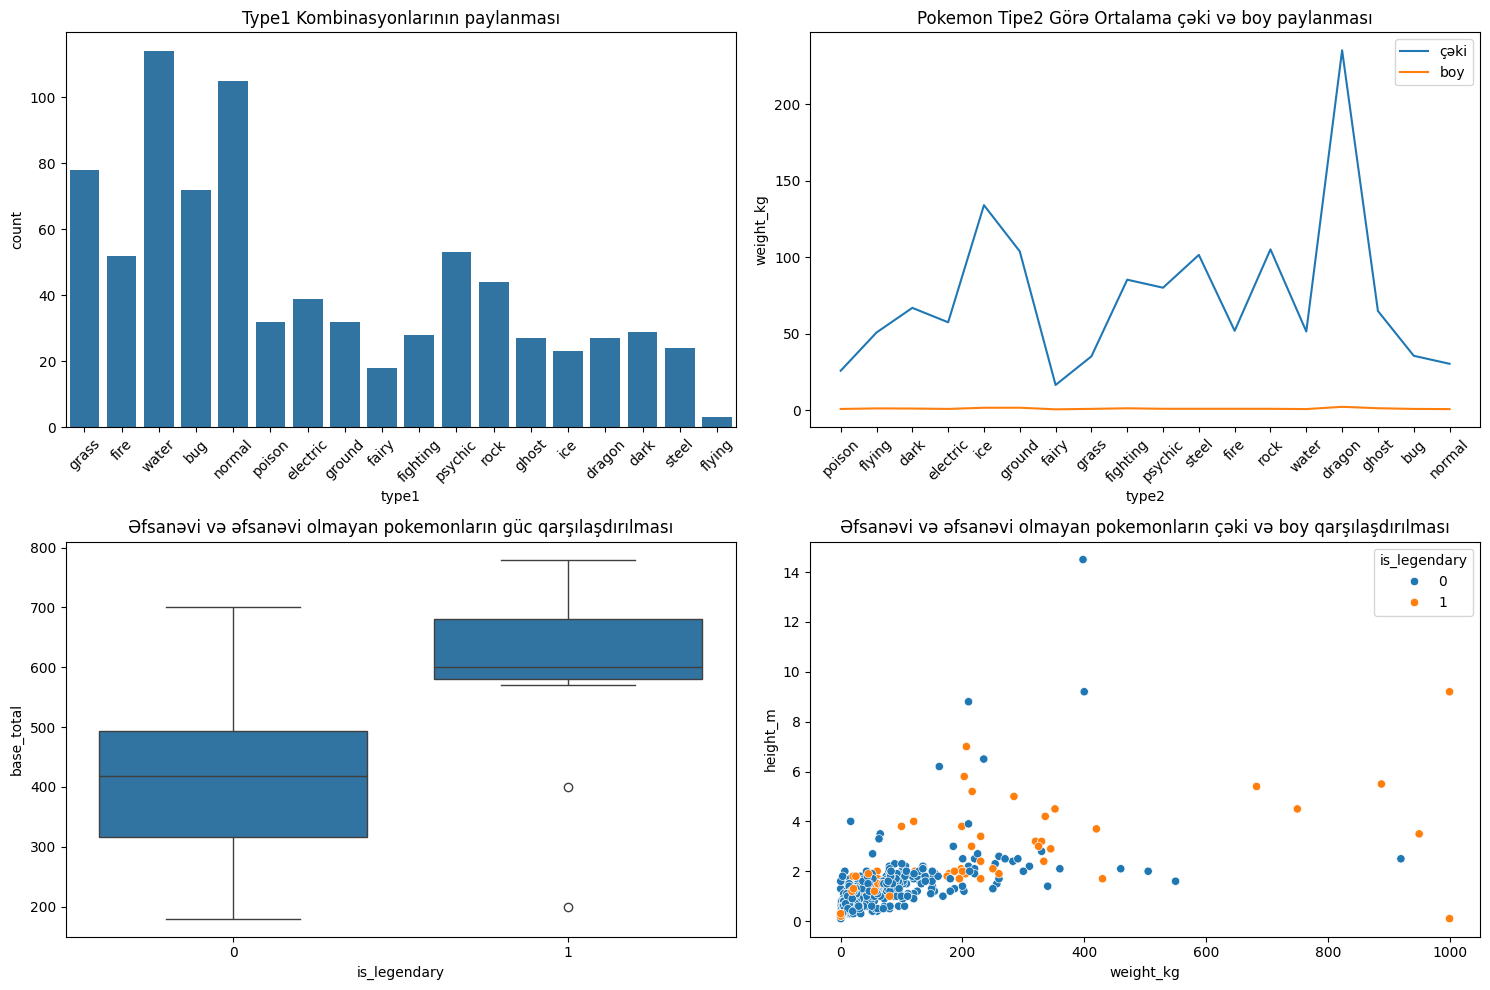

In [88]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.countplot(data=pokemon_df, x='type1')
plt.title('Type1 Kombinasyonlarının paylanması')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
sns.lineplot(data=pokemon_df, x='type2', y='weight_kg', estimator='mean', ci=None)
sns.lineplot(data=pokemon_df, x='type2', y='height_m', estimator='mean', ci=None)
plt.title('Pokemon Tipe2 Görə Ortalama çəki və boy paylanması')
plt.xticks(rotation=45)
plt.legend(['çəki', 'boy'])

plt.subplot(2, 2, 3)
sns.boxplot(data=pokemon_df, x='is_legendary', y='base_total')
plt.title('Əfsanəvi və əfsanəvi olmayan pokemonların güc qarşılaşdırılması')

plt.subplot(2, 2, 4)
sns.scatterplot(data=pokemon_df, x='weight_kg', y='height_m', hue='is_legendary')
plt.title('Əfsanəvi və əfsanəvi olmayan pokemonların çəki və boy qarşılaşdırılması')

plt.tight_layout()
plt.show()
